In [1]:

import pandas as pd
import matplotlib.pyplot as plt


ex 1

In [3]:
file_path = 'Homework_sampledata1.txt'

# Open the file and process the content
with open(file_path, 'r') as file:
    data_lines = [
        [float(value) for value in line.split()[1:]]  # Skip the first column and convert to float
        for line in file.readlines()[1:]  # Skip the header row
    ]

# Output the processed data lines
data_lines

[[10.5, 7.3, 10.8, 18.2, 20.0, 25.3, 27.2, 25.1, 25.8, 23.0, 24.9, 12.6],
 [9.8, 10.4, 10.7, 18.0, 25.4, 24.8, 26.6, 26.1, 26.7, 23.5, 20.9, 13.9],
 [10.7, 11.0, 11.7, 18.8, 25.4, 26.5, 27.4, 25.8, 25.1, 24.5, 20.4, 17.7],
 [15.1, 12.9, 12.4, 20.4, 26.5, 25.2, 27.2, 25.3, 26.0, 23.0, 23.1, 20.5],
 [13.5, 11.4, 16.0, 22.4, 24.0, 26.0, 26.2, 26.2, 23.5, 22.7, 22.5, 16.7],
 [16.0, 11.0, 16.7, 23.6, 24.0, 26.2, 25.5, 26.4, 24.6, 22.8, 23.8, 17.6],
 [15.8, 10.3, 17.1, 23.6, 25.1, 27.8, 25.0, 25.0, 24.7, 24.4, 19.6, 16.4],
 [15.8, 12.1, 16.9, 26.4, 25.1, 24.8, 25.8, 26.3, 25.3, 24.1, 18.5, 12.7],
 [18.0, 11.7, 17.8, 23.8, 22.5, 26.2, 25.6, 24.3, 22.7, 24.0, 17.2, 12.6],
 [20.2, -99.0, 18.0, 23.8, 19.8, 24.9, 26.8, 24.9, 23.7, 25.5, 16.0, 16.9],
 [18.3, 10.6, 17.5, 24.3, 22.4, 25.4, 27.0, 25.7, 24.9, 24.6, 16.1, 14.5],
 [20.9, 10.9, 18.1, 24.8, 23.2, 26.0, 24.6, 25.2, 25.0, 23.9, 16.9, 16.9],
 [17.4, 11.3, 19.0, 22.6, 21.4, 26.9, 27.5, 26.9, 24.5, 21.9, 17.9, 18.0],
 [14.5, 10.8, 18.5, 23.7, 

In [4]:

first_day_values = data_lines[0]

first_day_dataframe = pd.DataFrame([
    {
        'Date': f'2008-{month_index + 1:02}-01',  
        'Time': '00:00:00',  
        'Temperature': None if temp == -99 else temp 
    }
    for month_index, temp in enumerate(first_day_values)
])


first_day_dataframe

,Date,Time,Temperature
0,2008-01-01,00:00:00,10.5
1,2008-02-01,00:00:00,7.3
2,2008-03-01,00:00:00,10.8
3,2008-04-01,00:00:00,18.2
4,2008-05-01,00:00:00,20.0
5,2008-06-01,00:00:00,25.3
6,2008-07-01,00:00:00,27.2
7,2008-08-01,00:00:00,25.1
8,2008-09-01,00:00:00,25.8
9,2008-10-01,00:00:00,23.0


ex2

In [5]:

num_days = len(data_lines)
num_months = len(data_lines[0])

all_days_data = [
    {
        'Date': f'2008-{month_index + 1:02}-{day_index + 1:02}',  
        'Time': '00:00:00',  
        'Temperature': None if data_lines[day_index][month_index] == -99 else data_lines[day_index][month_index]  
    }
    for month_index in range(num_months)
    for day_index in range(num_days)
]

all_days_df = pd.DataFrame(all_days_data)
all_days_df

# Create the DataFrame
all_days_df = pd.DataFrame(all_days_data)

# Export the DataFrame to a CSV file
all_days_df.to_csv('all_days_data.csv', index=False)

# Optionally print a message to confirm saving
print("Data saved to all_days_data.csv")

Data saved to all_days_data.csv


ex3

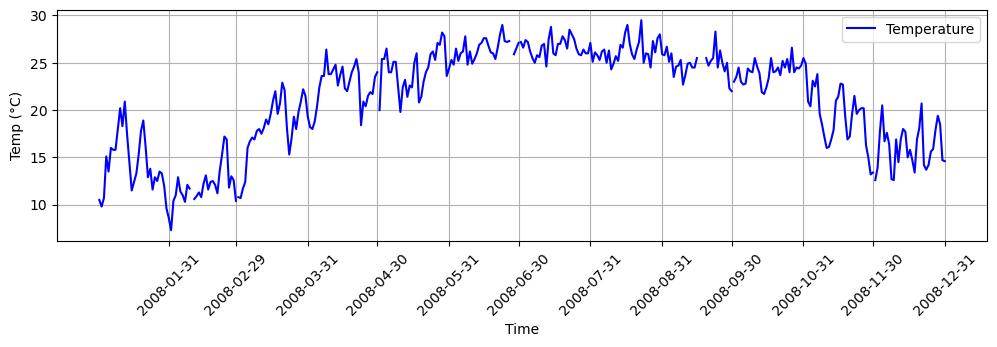

In [6]:

all_days_df['Date'] = pd.to_datetime(all_days_df['Date'], errors='coerce')

plt.figure(figsize=(12, 3))
plt.plot(all_days_df['Date'], all_days_df['Temperature'], linestyle='-', color='b', label='Temperature')

plt.xlabel('Time')
plt.ylabel('Temp (°C)')

plt.xticks(
    all_days_df['Date'][all_days_df['Date'].dt.is_month_end],
    rotation=45
)

plt.grid()
plt.legend()

plt.savefig('Figure1_1.png', bbox_inches='tight')
plt.show()

ex4

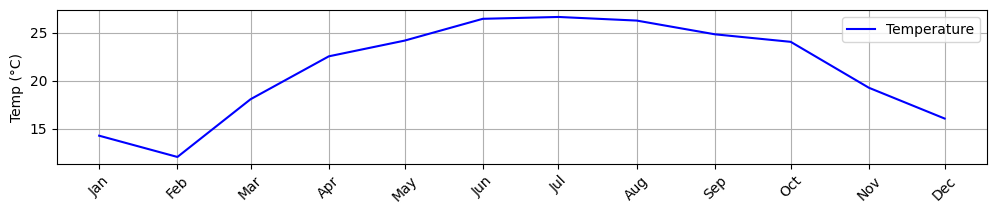

In [73]:

all_days_df['Date'] = pd.to_datetime(all_days_df['Date'], errors='coerce')

monthly_mean = (all_days_df.groupby(all_days_df['Date'].dt.to_period('M'))['Temperature'].mean().reset_index())

monthly_mean['Date'] = monthly_mean['Date'].dt.to_timestamp()

plt.figure(figsize=(10, 3))
plt.plot(monthly_mean['Date'], monthly_mean['Temperature'], linestyle='-', color='b', label='Temperature')

plt.ylabel('Temp (°C)')
plt.xticks(monthly_mean['Date'], monthly_mean['Date'].dt.strftime('%b'), rotation=45)
plt.legend()
plt.grid()

# Save and show the plot
plt.savefig('Figure1_2.png', bbox_inches='tight')
plt.show()